In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## ML applied on the MMSeqs2 dataset

#### Pre-Processing (if required)

In [2]:
df_mmseqs = pd.read_csv('PhageAcr_ML_dataset_mmseqs.csv')               # Read dataset
df_mmseqs.set_index('ID', inplace=True)                                 # Set the "ID" column as the index
df_mmseqs = df_mmseqs.rename(columns={'Protein Acr': 'Protein_Acr'})    # Rename column to avoid issues later
df_mmseqs

,Size,Protein_Acr,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
ID,,,,,,,,,,,,,,,,,,,,,
RGB60049.1,105,1,105.0,-2.901,-0.000240,539,826,136,171,3,...,4.980767,34.719048,0.266667,0.323810,0.390476,14440,14440,82.666667,1.931333,0.361905
WP_103240931.1,195,1,195.0,-17.844,-0.000784,1004,1492,274,310,11,...,4.608869,34.520000,0.343590,0.282051,0.307692,50420,50670,67.538462,2.295333,0.343590
WP_086652143.1,179,1,179.0,-20.646,-0.001021,888,1361,223,299,7,...,4.386572,54.459832,0.402235,0.217877,0.346369,25900,25900,81.899441,1.828212,0.391061
WP_012242545.1,144,1,144.0,-0.834,-0.000050,757,1149,189,232,4,...,6.289712,33.052083,0.291667,0.291667,0.402778,41940,42065,82.430556,1.778750,0.319444
WP_062681378.1,150,1,150.0,-19.684,-0.001198,721,1113,185,244,3,...,4.110619,34.327400,0.340000,0.286667,0.373333,11460,11460,98.333333,1.572533,0.426667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AYD80647.1,1281,0,1281.0,3.049,0.000022,6044,9544,1658,1995,16,...,8.069395,24.002966,0.252147,0.313817,0.398907,168110,168110,80.257611,1.705667,0.330211
WP_082645163.1,261,0,261.0,-9.853,-0.000355,1223,1946,316,390,10,...,4.653715,25.518391,0.325670,0.252874,0.406130,26470,26470,98.007663,0.908123,0.448276
WP_077534944.1,195,0,195.0,-1.186,-0.000054,944,1449,263,311,10,...,5.727518,60.915897,0.374359,0.235897,0.287179,39420,39545,65.743590,2.140821,0.379487


In [3]:
df_mmseqs.isna().sum() # Check if any of the columns have missing values

Size                                     0
Protein_Acr                              0
length                                   0
charge                                   0
chargedensity                            0
formulaC                                 0
formulaH                                 0
formulaN                                 0
formulaO                                 0
formulaS                                 0
tot                                      0
hydrogen                                 0
single                                   0
double                                   0
MW_modlamp                               0
Gravy                                    0
Aromacity                                0
IsoelectricPoint                         0
Instability_index                        0
SecStruct_helix                          0
SecStruct_turn                           0
SecStruct_sheet                          0
Molar_extinction_coefficient_reduced     0
Molar_extin

In [4]:
df_mmseqs.info() # Check column types

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, RGB60049.1 to KHF26830.1
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Size                                   2212 non-null   int64  
 1   Protein_Acr                            2212 non-null   int64  
 2   length                                 2212 non-null   float64
 3   charge                                 2212 non-null   float64
 4   chargedensity                          2212 non-null   float64
 5   formulaC                               2212 non-null   int64  
 6   formulaH                               2212 non-null   int64  
 7   formulaN                               2212 non-null   int64  
 8   formulaO                               2212 non-null   int64  
 9   formulaS                               2212 non-null   int64  
 10  tot                                    2212 non-null   int64  

In [5]:
df_mmseqs.describe(include='all') # Check statistics

,Size,Protein_Acr,length,charge,chargedensity,formulaC,formulaH,formulaN,formulaO,formulaS,...,IsoelectricPoint,Instability_index,SecStruct_helix,SecStruct_turn,SecStruct_sheet,Molar_extinction_coefficient_reduced,Molar_extinction_coefficient_oxidized,aliphatic_index,bomanindex,hydrophobic_ratio
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,243.403255,0.500000,243.374774,-6.534474,-0.000279,1184.306058,1843.261302,315.565099,378.321881,7.746835,...,5.710305,35.579229,0.332045,0.281237,0.357984,32717.662749,32803.896926,82.267622,1.653862,0.369035
std,180.911242,0.500113,180.906677,8.483597,0.000400,853.483733,1337.533393,234.133173,278.097589,5.218354,...,1.479793,11.533871,0.046964,0.041405,0.041516,24635.786620,24675.652686,11.195202,0.492524,0.038009
min,47.000000,0.000000,47.000000,-56.820000,-0.001984,235.000000,360.000000,58.000000,71.000000,0.000000,...,4.050028,-2.384375,0.168919,0.147368,0.206612,0.000000,0.000000,37.142857,-0.135890,0.227848
25%,104.000000,0.000000,104.000000,-10.336250,-0.000426,529.000000,830.000000,137.750000,166.000000,4.000000,...,4.768672,28.083602,0.301800,0.255556,0.330573,14440.000000,14440.000000,75.123132,1.318215,0.344359
50%,155.000000,0.500000,155.000000,-5.065000,-0.000232,767.000000,1176.500000,200.000000,246.000000,6.000000,...,5.206986,35.095411,0.330836,0.283333,0.355004,24980.000000,24980.000000,82.254030,1.628457,0.367877
75%,392.000000,1.000000,392.000000,-1.266500,-0.000070,1881.250000,2956.000000,504.250000,600.250000,10.000000,...,6.090037,42.711416,0.360825,0.307692,0.382740,44920.000000,45107.500000,88.961858,1.984334,0.392884
max,1528.000000,1.000000,1528.000000,26.079000,0.001504,6997.000000,11033.000000,1885.000000,2326.000000,34.000000,...,11.800051,83.999286,0.506494,0.475207,0.571429,216580.000000,216830.000000,135.324675,4.079714,0.537975


## Preparing training, testing and validation sets

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Extracting features (X) and target variable (y)
X = df_mmseqs.drop('Protein_Acr', axis=1)    # Keep only the features in variable x
y = df_mmseqs['Protein_Acr']                 # Assign our Target variable as y

# Split the dataset into training+validation (80%) and test sets (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # random_state will allow for the reproductibility of the split

# Split the training+validation set into training (70%) and validation sets (10% of the original data)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Checking the shape of the resulting sets
print(f'Training Set \t Shape of X_train: {X_train.shape} \n\t\t Shape of y_train: {y_train.shape} \n')
print(f'Validation Set \t Shape of X_val: {X_val.shape} \n\t\t Shape of y_val: {y_val.shape} \n')
print(f'Test Set \t Shape of X_test: {X_test.shape} \n\t\t Shape of y_test: {y_test.shape}')

Training Set 	 Shape of X_train: (1547, 26) 
		 Shape of y_train: (1547,) 

Validation Set 	 Shape of X_val: (222, 26) 
		 Shape of y_val: (222,) 

Test Set 	 Shape of X_test: (443, 26) 
		 Shape of y_test: (443,)


#### Decision Tree Model

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Validation Results:
Accuracy: 0.86
Precision: 0.88
Recall: 0.84
F1-Score: 0.86


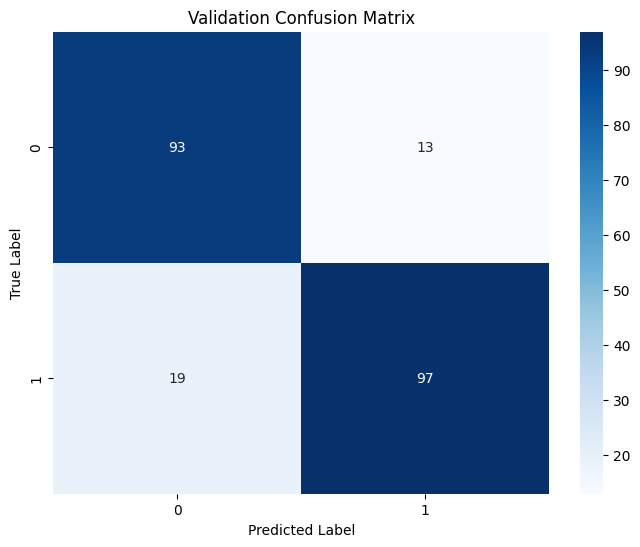

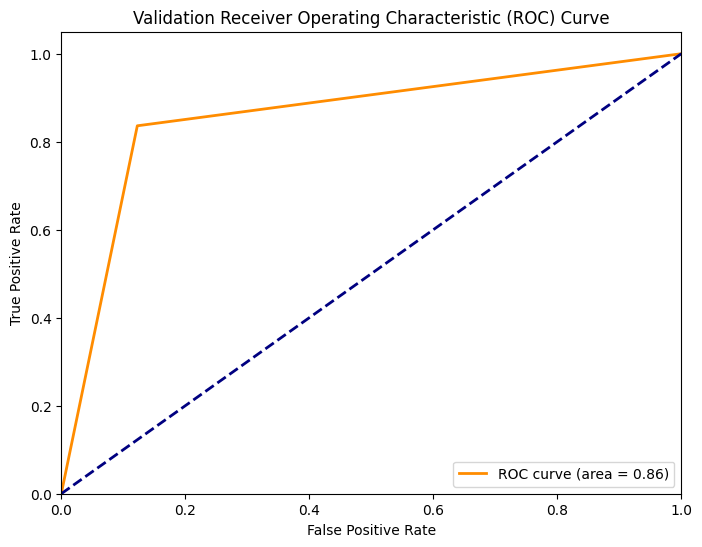

In [8]:
# Make predictions on the validation set
y_val_pred_dt = dt_model.predict(X_val)

# Calculate evaluation metrics for the validation set
val_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
val_precision_dt = precision_score(y_val, y_val_pred_dt)
val_recall_dt = recall_score(y_val, y_val_pred_dt)
val_f1_dt = f1_score(y_val, y_val_pred_dt)

# Print the evaluation metrics for Decision Tree
print("Decision Tree Validation Results:")
print(f"Accuracy: {val_accuracy_dt:.2f}")
print(f"Precision: {val_precision_dt:.2f}")
print(f"Recall: {val_recall_dt:.2f}")
print(f"F1-Score: {val_f1_dt:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred_dt)

## Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Validation Confusion Matrix')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the validation set
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred_dt)
val_roc_auc = auc(val_fpr, val_tpr)

## Plot ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(val_fpr, val_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Decision Tree Test Results:
Test Accuracy: 0.86
Test Precision: 0.89
Test Recall: 0.84
Test F1-Score: 0.86


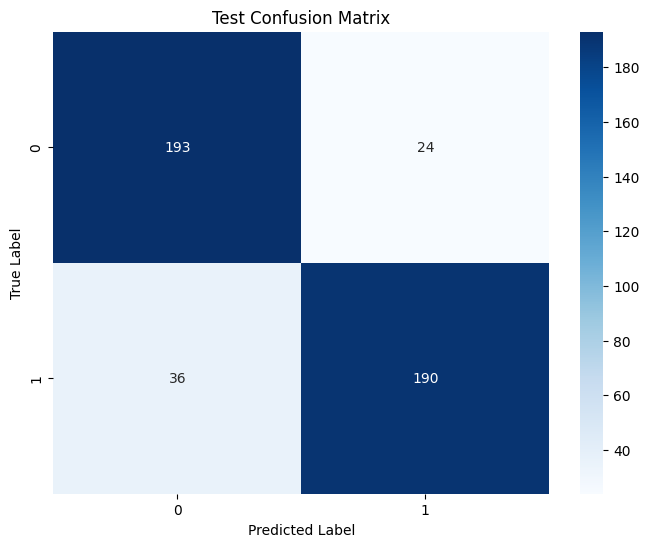

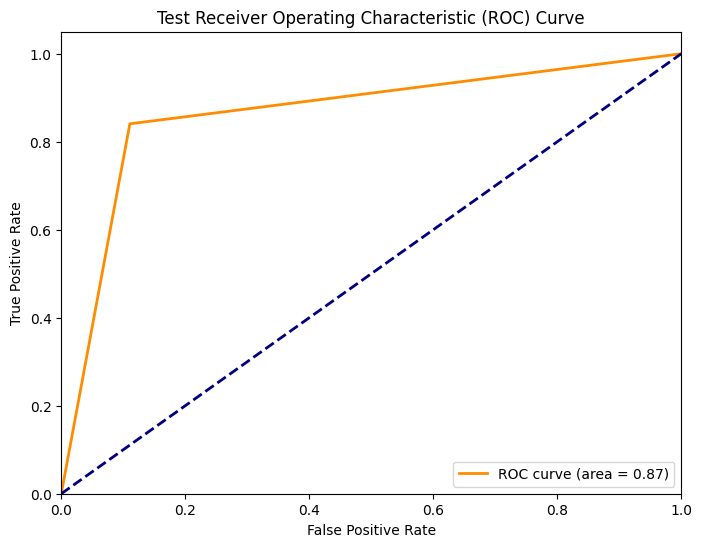

In [9]:
# Make predictions on the test set
y_test_pred_dt = dt_model.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score for the test set
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt)
test_recall_dt = recall_score(y_test, y_test_pred_dt)
test_f1_dt = f1_score(y_test, y_test_pred_dt)

print("Decision Tree Test Results:")
print(f"Test Accuracy: {test_accuracy_dt:.2f}")
print(f"Test Precision: {test_precision_dt:.2f}")
print(f"Test Recall: {test_recall_dt:.2f}")
print(f"Test F1-Score: {test_f1_dt:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_dt)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the test set
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred_dt)
test_roc_auc = auc(test_fpr, test_tpr)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### RandomForest Model

Compared to Decision Tree, RandomForest performed better on both validation and test sets, especially in terms of recall and F1-Score. This improvement is due to the ensemble approach of RandomForest, which mitigates overfitting and leverages the strengths of multiple trees.

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

RandomForest Validation Results:
Validation Accuracy: 0.94
Validation Precision: 0.91
Validation Recall: 0.97
Validation F1-Score: 0.94


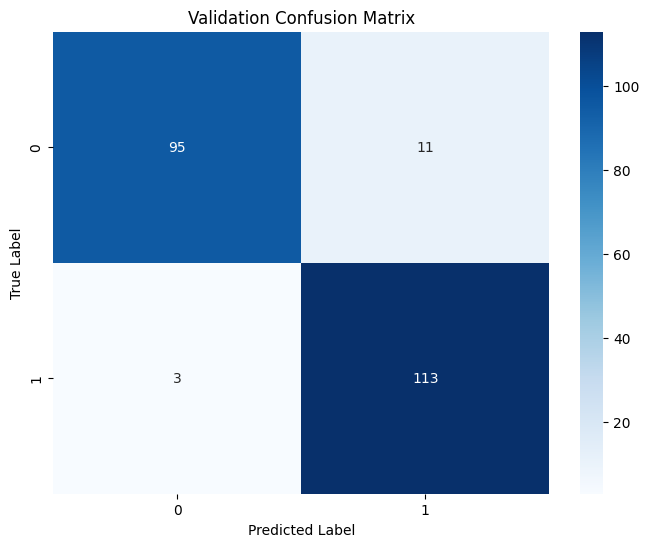

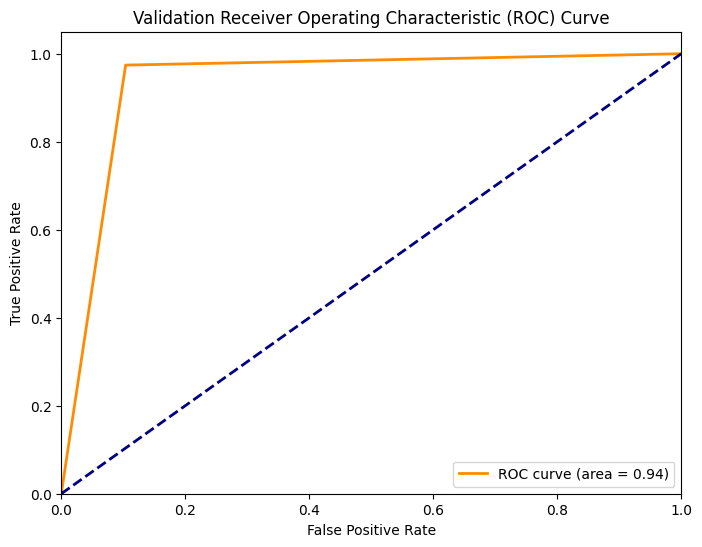

In [11]:
# Make predictions on the validation set
y_val_pred_rf = rf_model.predict(X_val)

# Calculate accuracy, precision, recall, and f1-score for the validation set
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
val_precision_rf = precision_score(y_val, y_val_pred_rf)
val_recall_rf = recall_score(y_val, y_val_pred_rf)
val_f1_rf = f1_score(y_val, y_val_pred_rf)

print("RandomForest Validation Results:")
print(f"Validation Accuracy: {val_accuracy_rf:.2f}")
print(f"Validation Precision: {val_precision_rf:.2f}")
print(f"Validation Recall: {val_recall_rf:.2f}")
print(f"Validation F1-Score: {val_f1_rf:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred_rf)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Validation Confusion Matrix')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the validation set
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred_rf)
val_roc_auc = auc(val_fpr, val_tpr)

# Plot ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(val_fpr, val_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

RandomForest Test Results:
Test Accuracy: 0.94
Test Precision: 0.93
Test Recall: 0.96
Test F1-Score: 0.94


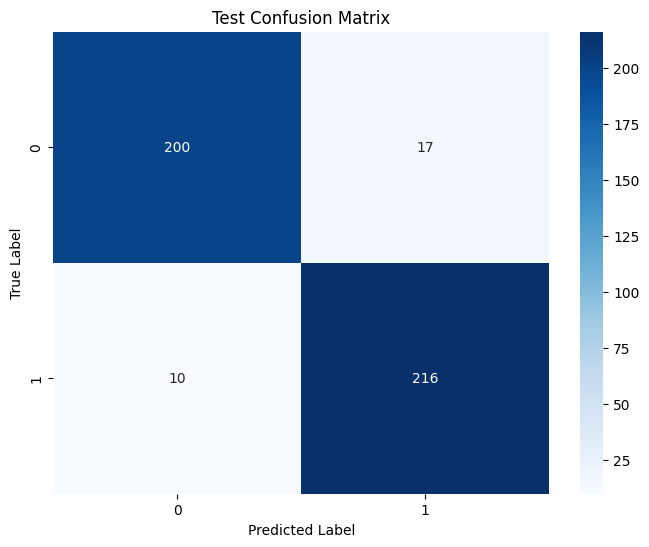

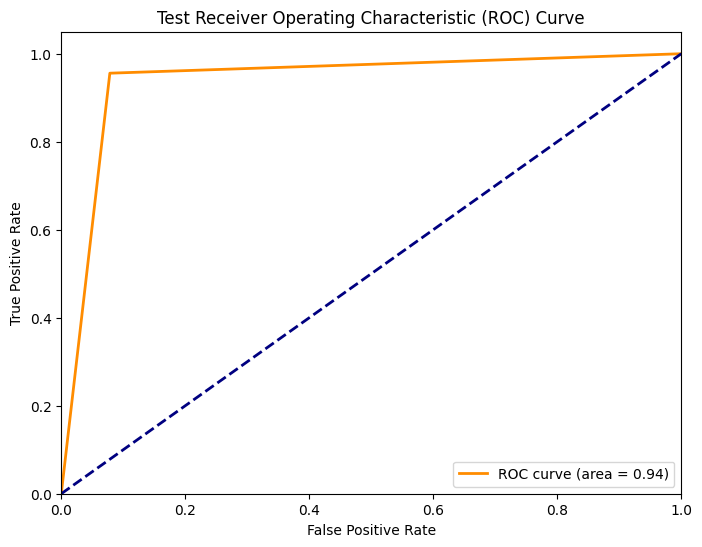

In [12]:
# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score for the test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
test_f1_rf = f1_score(y_test, y_test_pred_rf)

print("RandomForest Test Results:")
print(f"Test Accuracy: {test_accuracy_rf:.2f}")
print(f"Test Precision: {test_precision_rf:.2f}")
print(f"Test Recall: {test_recall_rf:.2f}")
print(f"Test F1-Score: {test_f1_rf:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the test set
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred_rf)
test_roc_auc = auc(test_fpr, test_tpr)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### SVM Model
The SVM model achieved lower accuracy and precision compared to the RandomForest model, but it has higher recall. This indicates that the SVM model is more sensitive to positive instances but might have more false positives.

The high recall score in both the validation and test sets indicates that the SVM model effectively identifies positive instances. It correctly identifies nearly all actual positive cases while keeping false negatives low.

The moderate precision score suggests that the model has a tendency to classify some negative instances as positive, leading to false positives. This is reflected in the confusion matrices with a non-zero count of false positives.

In [13]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model using the training data
svm_model.fit(X_train, y_train)

SVC(random_state=42)

SVM Validation Results:
Validation Accuracy: 0.83
Validation Precision: 0.77
Validation Recall: 0.98
Validation F1-Score: 0.86


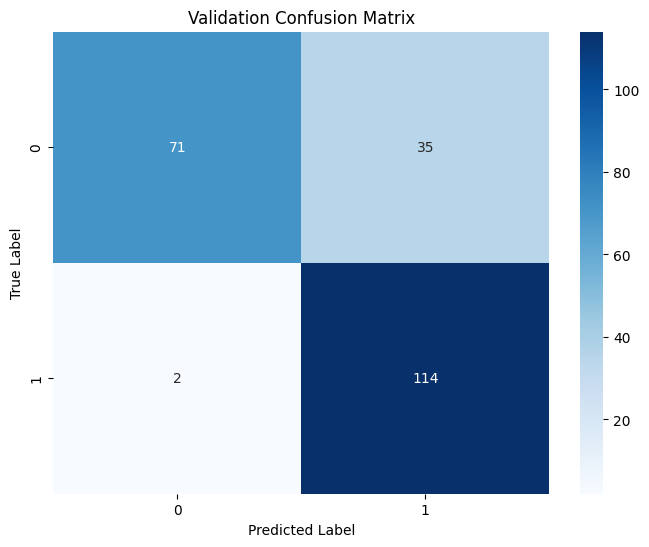

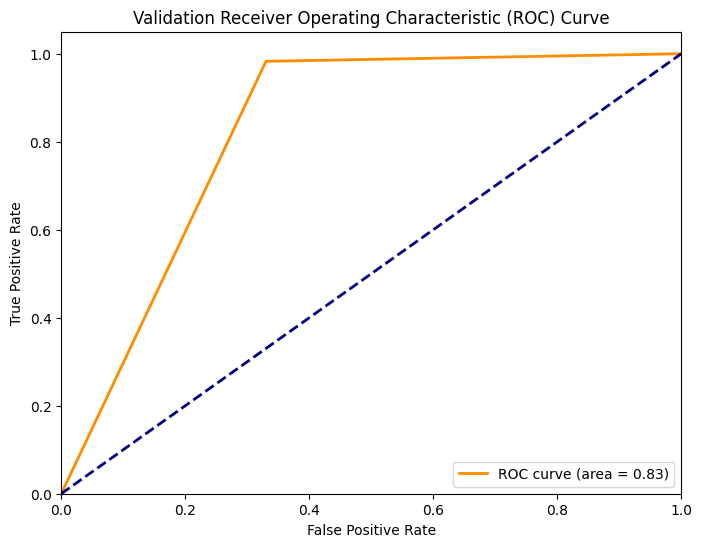

In [14]:
# Make predictions on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Calculate accuracy, precision, recall, and f1-score for the validation set
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)
val_precision_svm = precision_score(y_val, y_val_pred_svm)
val_recall_svm = recall_score(y_val, y_val_pred_svm)
val_f1_svm = f1_score(y_val, y_val_pred_svm)

print("SVM Validation Results:")
print(f"Validation Accuracy: {val_accuracy_svm:.2f}")
print(f"Validation Precision: {val_precision_svm:.2f}")
print(f"Validation Recall: {val_recall_svm:.2f}")
print(f"Validation F1-Score: {val_f1_svm:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred_svm)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Validation Confusion Matrix')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the validation set
val_fpr, val_tpr, _ = roc_curve(y_val, y_val_pred_svm)
val_roc_auc = auc(val_fpr, val_tpr)

# Plot ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(val_fpr, val_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {val_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SVM Test Results:
Test Accuracy: 0.88
Test Precision: 0.82
Test Recall: 0.99
Test F1-Score: 0.90


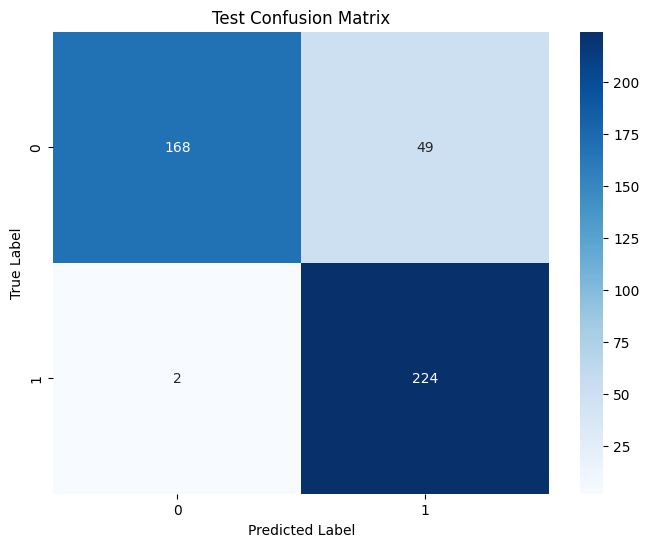

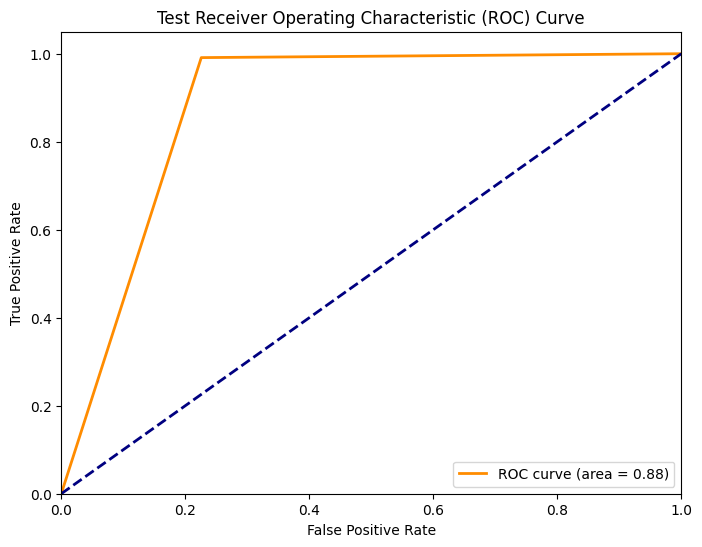

In [15]:
# Make predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score for the test set
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
test_precision_svm = precision_score(y_test, y_test_pred_svm)
test_recall_svm = recall_score(y_test, y_test_pred_svm)
test_f1_svm = f1_score(y_test, y_test_pred_svm)

print("SVM Test Results:")
print(f"Test Accuracy: {test_accuracy_svm:.2f}")
print(f"Test Precision: {test_precision_svm:.2f}")
print(f"Test Recall: {test_recall_svm:.2f}")
print(f"Test F1-Score: {test_f1_svm:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_svm)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the test set
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_pred_svm)
test_roc_auc = auc(test_fpr, test_tpr)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 6))
plt.plot(test_fpr, test_tpr, color='darkorange', lw=2, label=f'ROC curve (area = {test_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### XGBoost Model
The XGBoost model performs similarly to the RandomForest model, with high accuracy and strong precision and recall on both validation and test sets. The XGBoost model demonstrates robust performance across different evaluation metrics.

In [16]:
import xgboost as xgb

# Convert the data to DMatrix format, which is optimized for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Set XGBoost parameters
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'Validation')], early_stopping_rounds=10, verbose_eval=False)

XGBoost Validation Results:
Validation Accuracy: 0.92
Validation Precision: 0.92
Validation Recall: 0.93
Validation F1-Score: 0.92


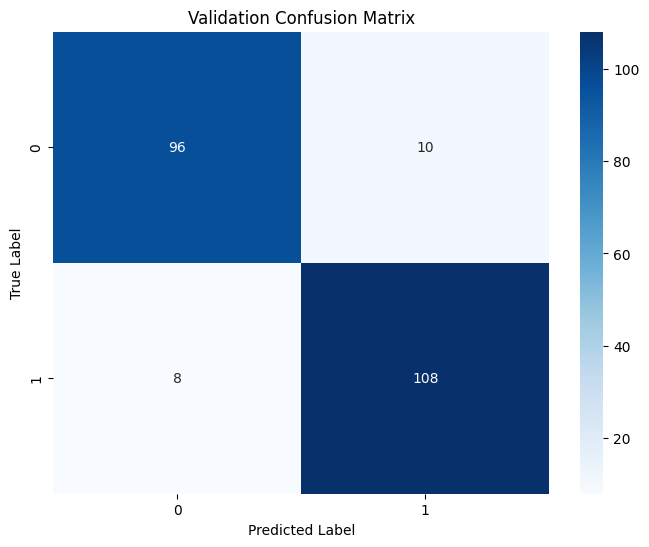

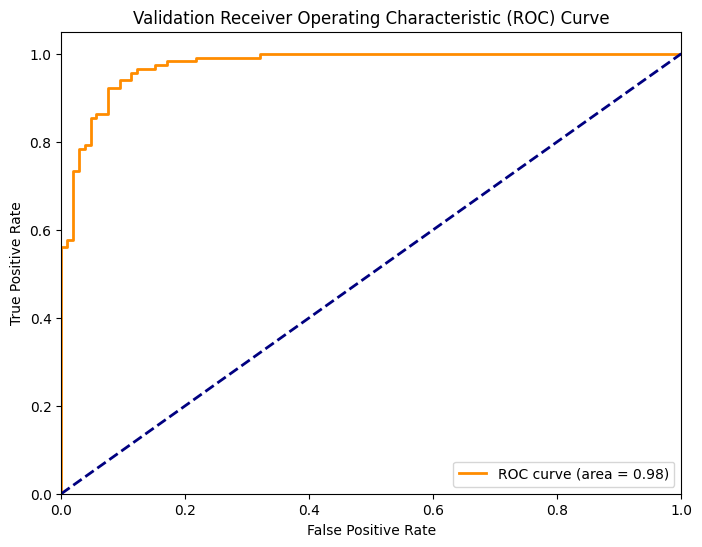

In [17]:
# Make predictions on the validation set
y_val_pred_xgb = xgb_model.predict(dval)

# Convert predictions to binary format
y_val_pred_binary = [1 if p >= 0.5 else 0 for p in y_val_pred_xgb]

# Calculate evaluation metrics
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_binary)
val_precision_xgb = precision_score(y_val, y_val_pred_binary)
val_recall_xgb = recall_score(y_val, y_val_pred_binary)
val_f1_xgb = f1_score(y_val, y_val_pred_binary)

print("XGBoost Validation Results:")
print(f"Validation Accuracy: {val_accuracy_xgb:.2f}")
print(f"Validation Precision: {val_precision_xgb:.2f}")
print(f"Validation Recall: {val_recall_xgb:.2f}")
print(f"Validation F1-Score: {val_f1_xgb:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the validation set
val_conf_matrix = confusion_matrix(y_val, y_val_pred_binary)

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Validation Confusion Matrix')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the validation set
y_val_pred_prob = xgb_model.predict(dval)                               # Calculate the predicted probabilities for the validation set
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_pred_prob)    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for the validation set
roc_auc_val = auc(fpr_val, tpr_val)                                     # Calculate the area under the ROC curve (AUC) for the validation set

# Plot the ROC curve for the validation set
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

XGBoost Test Results:
Test Accuracy: 0.94
Test Precision: 0.94
Test Recall: 0.95
Test F1-Score: 0.94


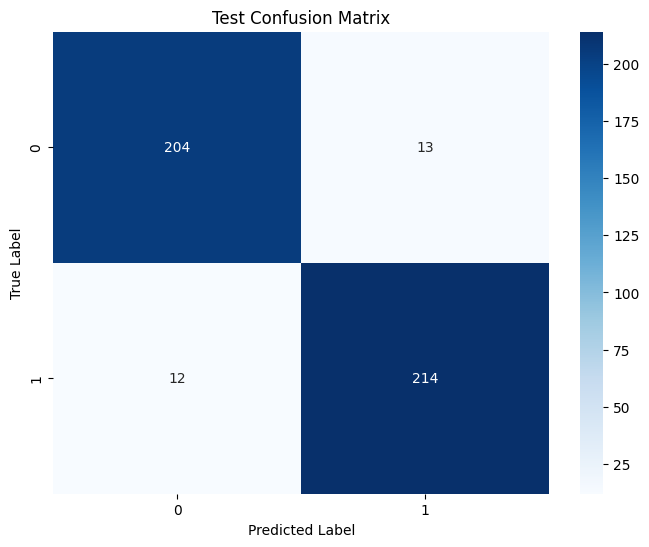

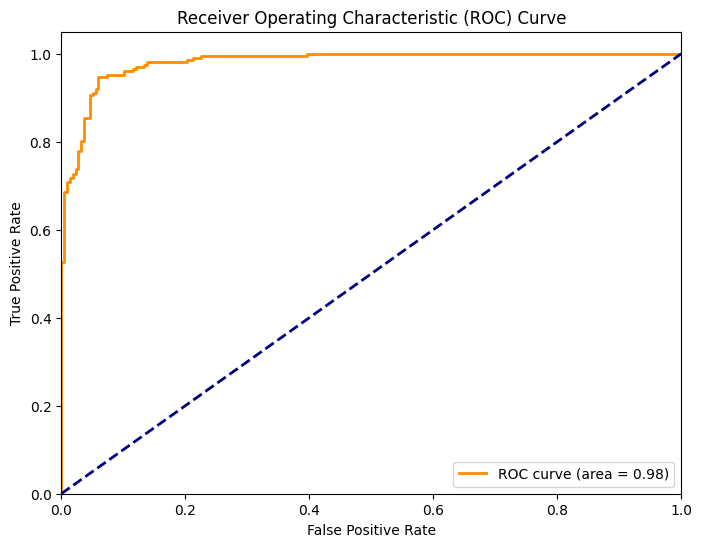

In [18]:
# Convert the test set to DMatrix format
dtest = xgb.DMatrix(X_test, label=y_test)

# Make predictions on the test set
y_test_pred_xgb = xgb_model.predict(dtest)
y_test_pred_binary = [1 if p >= 0.5 else 0 for p in y_test_pred_xgb]

# Calculate evaluation metrics
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_binary)
test_precision_xgb = precision_score(y_test, y_test_pred_binary)
test_recall_xgb = recall_score(y_test, y_test_pred_binary)
test_f1_xgb = f1_score(y_test, y_test_pred_binary)

print("XGBoost Test Results:")
print(f"Test Accuracy: {test_accuracy_xgb:.2f}")
print(f"Test Precision: {test_precision_xgb:.2f}")
print(f"Test Recall: {test_recall_xgb:.2f}")
print(f"Test F1-Score: {test_f1_xgb:.2f}")

### Confusion Matrix
# Generate the confusion matrix for the test set
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion Matrix')
plt.show()

### ROC Curve and AUC
# Calculate ROC curve and AUC for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_xgb)   # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
roc_auc = auc(fpr, tpr)                                     # Calculate the area under the ROC curve (AUC)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Further Comparisons between models

## Learning Curves

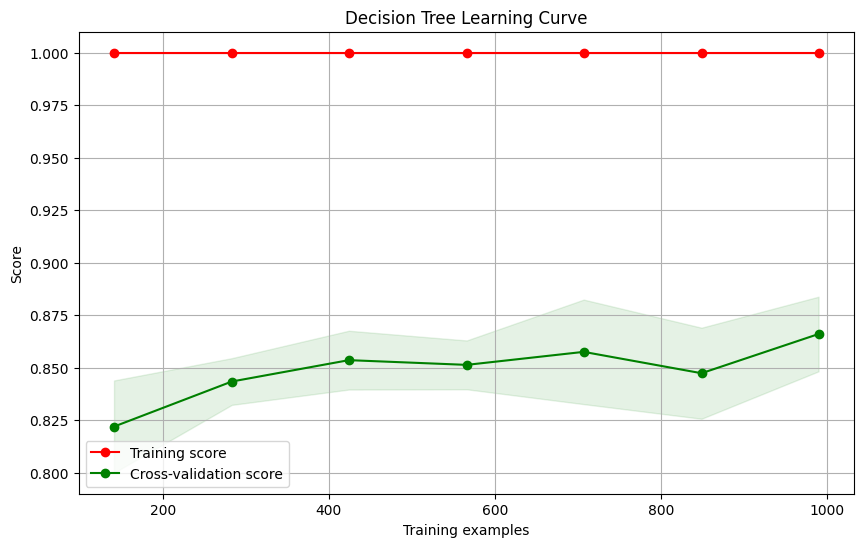

In [19]:
from sklearn.model_selection import learning_curve

# Define different training set sizes
train_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Calculate the learning curve for Decision Tree
train_sizes_dt, train_scores_dt, val_scores_dt = learning_curve(dt_model, X_temp, y_temp, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training scores
train_mean_dt = np.mean(train_scores_dt, axis=1)
train_std_dt = np.std(train_scores_dt, axis=1)

# Calculate mean and standard deviation of validation scores
val_mean_dt = np.mean(val_scores_dt, axis=1)
val_std_dt = np.std(val_scores_dt, axis=1)

# Plot the learning curve for Decision Tree
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_dt, train_mean_dt - train_std_dt, train_mean_dt + train_std_dt, alpha=0.1, color="r")
plt.fill_between(train_sizes_dt, val_mean_dt - val_std_dt, val_mean_dt + val_std_dt, alpha=0.1, color="g")
plt.plot(train_sizes_dt, train_mean_dt, 'o-', color="r", label="Training score")
plt.plot(train_sizes_dt, val_mean_dt, 'o-', color="g", label="Cross-validation score")
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

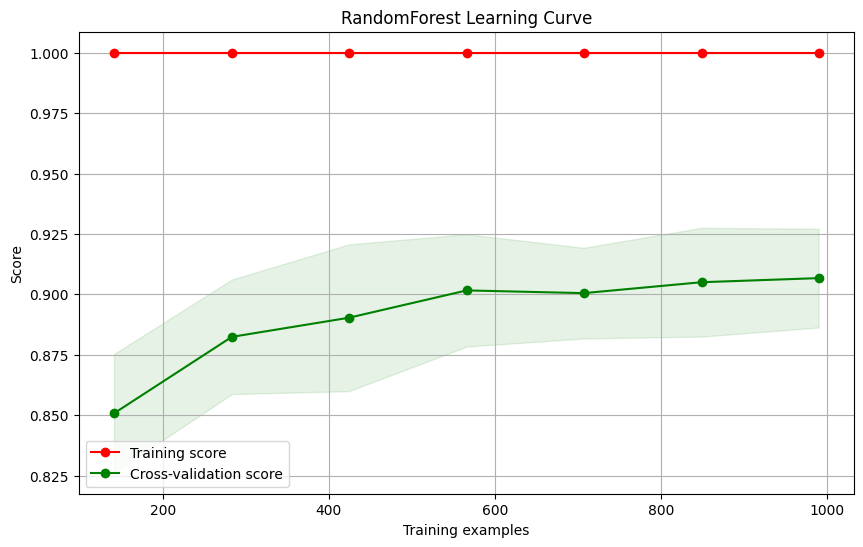

In [20]:
# Calculate the learning curve for RandomForest
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(rf_model, X_temp, y_temp, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training scores
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)

# Calculate mean and standard deviation of validation scores
val_mean_rf = np.mean(val_scores_rf, axis=1)
val_std_rf = np.std(val_scores_rf, axis=1)

# Plot the learning curve for RandomForest
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, alpha=0.1, color="r")
plt.fill_between(train_sizes_rf, val_mean_rf - val_std_rf, val_mean_rf + val_std_rf, alpha=0.1, color="g")
plt.plot(train_sizes_rf, train_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes_rf, val_mean_rf, 'o-', color="g", label="Cross-validation score")
plt.title("RandomForest Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

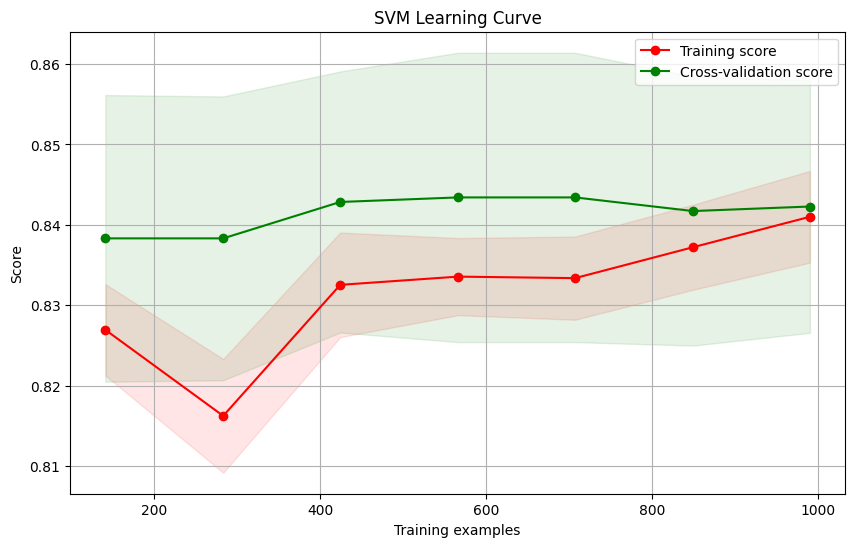

In [21]:
# Calculate the learning curve for SVM
train_sizes_svm, train_scores_svm, val_scores_svm = learning_curve(svm_model, X_temp, y_temp, train_sizes=train_sizes, cv=5)

# Calculate mean and standard deviation of training scores
train_mean_svm = np.mean(train_scores_svm, axis=1)
train_std_svm = np.std(train_scores_svm, axis=1)

# Calculate mean and standard deviation of validation scores
val_mean_svm = np.mean(val_scores_svm, axis=1)
val_std_svm = np.std(val_scores_svm, axis=1)

# Plot the learning curve for SVM
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_svm, train_mean_svm - train_std_svm, train_mean_svm + train_std_svm, alpha=0.1, color="r")
plt.fill_between(train_sizes_svm, val_mean_svm - val_std_svm, val_mean_svm + val_std_svm, alpha=0.1, color="g")
plt.plot(train_sizes_svm, train_mean_svm, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svm, val_mean_svm, 'o-', color="g", label="Cross-validation score")
plt.title("SVM Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

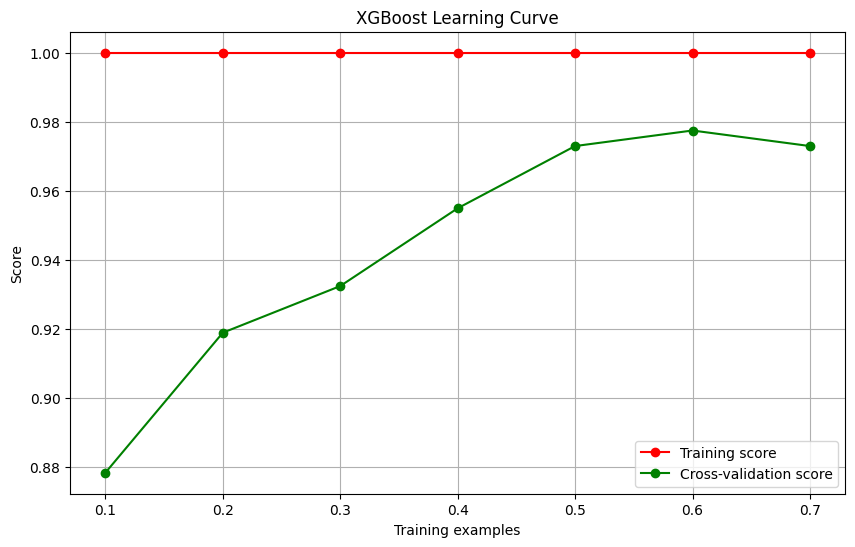

In [22]:
# Initialize lists to store training and validation scores
train_scores_xgb = []
val_scores_xgb = []

# Train XGBoost model for different training set sizes
for size in train_sizes:
    # Split the training set into subsets of the desired size
    X_train_subset = X_temp[:int(len(X_temp) * size)]
    y_train_subset = y_temp[:int(len(y_temp) * size)]
    
    # Convert the subset data to DMatrix format
    dtrain_subset = xgb.DMatrix(X_train_subset, label=y_train_subset)
    dval_subset = xgb.DMatrix(X_val, label=y_val)
    
    # Train the XGBoost model
    xgb_model_subset = xgb.train(params, dtrain_subset, num_boost_round=1000, evals=[(dval_subset, 'Validation')], early_stopping_rounds=10, verbose_eval=False)
    
    # Make predictions on the training and validation sets
    y_train_pred_subset = xgb_model_subset.predict(dtrain_subset)
    y_val_pred_subset = xgb_model_subset.predict(dval_subset)
    
    # Calculate the accuracy scores
    train_accuracy_subset = accuracy_score(y_train_subset, [1 if p >= 0.5 else 0 for p in y_train_pred_subset])
    val_accuracy_subset = accuracy_score(y_val, [1 if p >= 0.5 else 0 for p in y_val_pred_subset])
    
    # Append the accuracy scores to the lists
    train_scores_xgb.append(train_accuracy_subset)
    val_scores_xgb.append(val_accuracy_subset)

# Plot the learning curve for XGBoost
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_xgb, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_xgb, 'o-', color="g", label="Cross-validation score")
plt.title("XGBoost Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

### ROC Curves

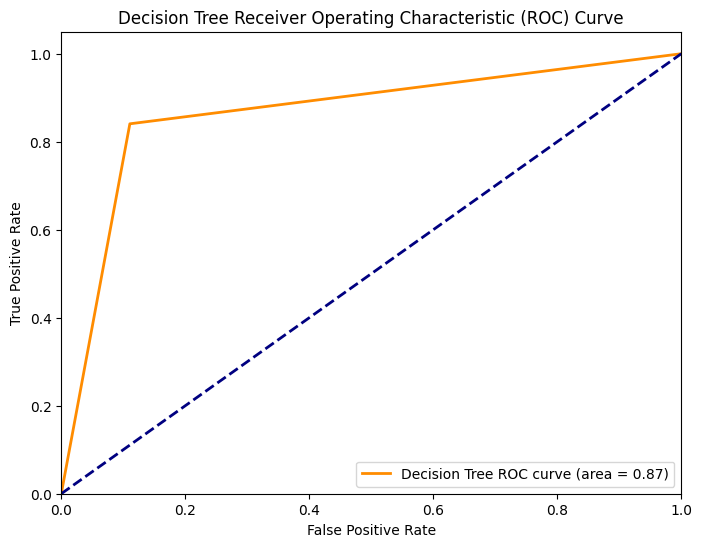

In [23]:
# Make predictions on the test set for Decision Tree
y_test_pred_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_test_pred_dt)

# Calculate the area under the ROC curve (AUC) for Decision Tree
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

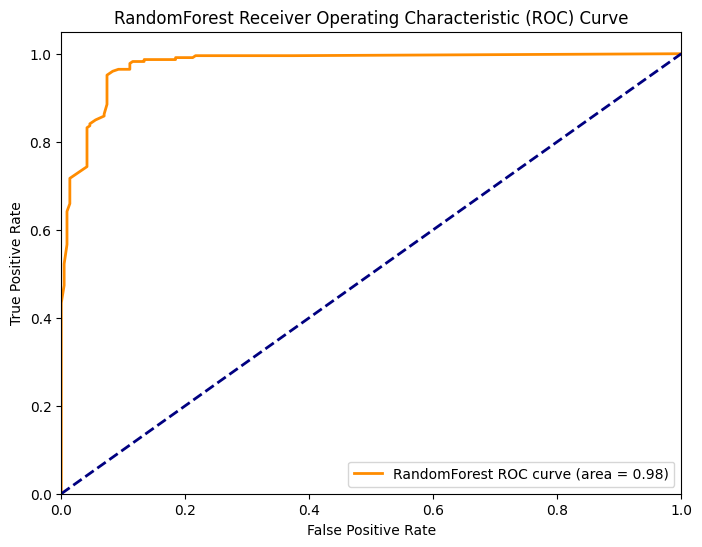

In [24]:
# Make predictions on the test set for RandomForest
y_test_pred_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for RandomForest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_pred_rf)

# Calculate the area under the ROC curve (AUC) for RandomForest
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve for RandomForest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RandomForest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

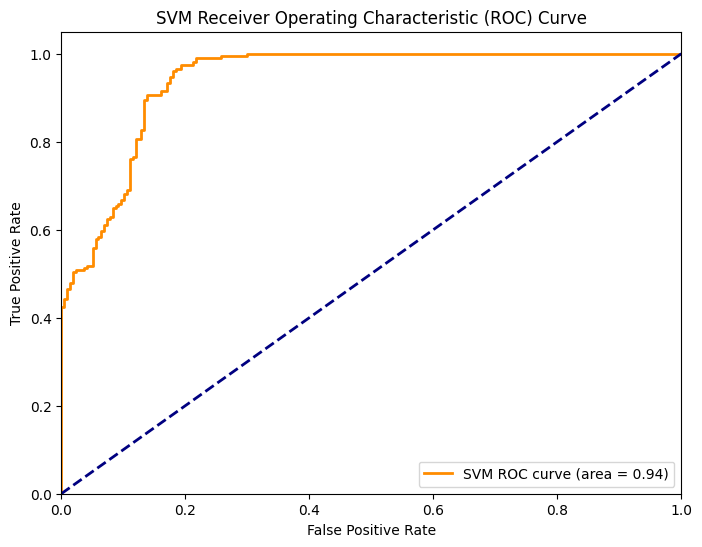

In [25]:
# Make predictions on the test set for SVM
y_test_pred_svm = svm_model.decision_function(X_test)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_test_pred_svm)

# Calculate the area under the ROC curve (AUC) for SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

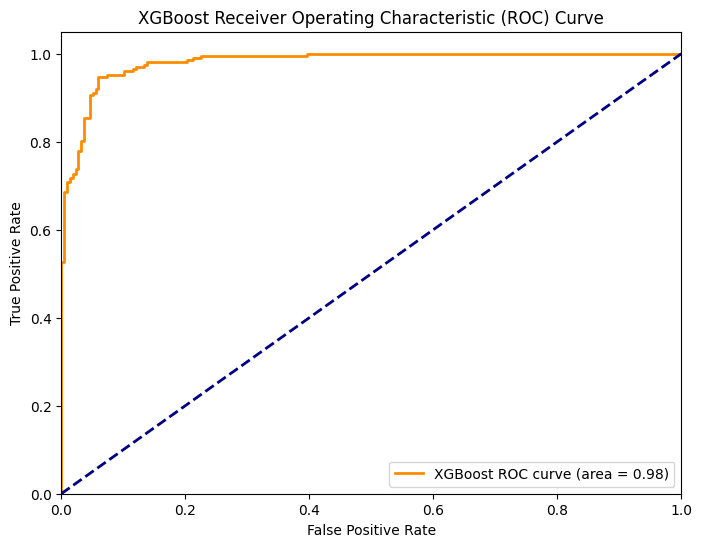

In [26]:
# Make predictions on the test set for XGBoost
y_test_pred_xgb = xgb_model.predict(dtest)

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_test_pred_xgb)

# Calculate the area under the ROC curve (AUC) for XGBoost
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Plotting the time it takes to run each algorithm

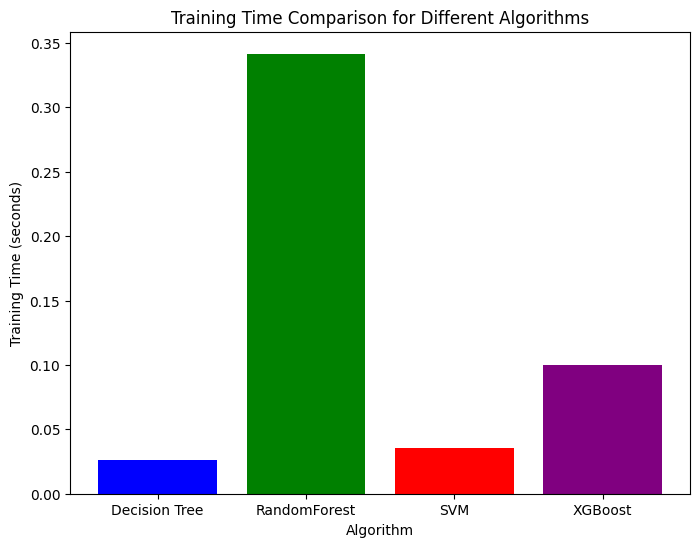

In [27]:
import time

# Initialize lists to store training times for each algorithm
training_times = []

# Train Decision Tree and measure training time
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()
training_times.append(end_time - start_time)

# Train RandomForest and measure training time
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
training_times.append(end_time - start_time)

# Train SVM and measure training time
start_time = time.time()
svm_model.fit(X_train, y_train)
end_time = time.time()
training_times.append(end_time - start_time)

# Train XGBoost and measure training time
start_time = time.time()
xgb_model = xgb.train(params, dtrain, num_boost_round=1000, evals=[(dval, 'Validation')], early_stopping_rounds=10, verbose_eval=False)
end_time = time.time()
training_times.append(end_time - start_time)

# Plot the training times for each algorithm
plt.figure(figsize=(8, 6))
models = ['Decision Tree', 'RandomForest', 'SVM', 'XGBoost']
plt.bar(models, training_times, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Algorithm')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison for Different Algorithms')
plt.show()

## Hyperparameter Tuning
Involves finding the best set of hyperparameters for each ML algorithm to optimize its performance.

The codes will perform hyperparameter tuning for each algorithm using GridSearchCV, find the best set of hyperparameters, and train each model with the best hyperparameters. Then, it will evaluate the tuned models on the validation set and print the evaluation metrics.

Hyperparameter tuning for SVM can be computationally expensive, especially for large datasets. So we will be skipping it (leaving it at default).

### Hyperparameter Tuning for Decision Tree:

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# Initialize Decision Tree classifier with best hyperparameters
best_dt_model = DecisionTreeClassifier(random_state=42, **best_params_dt)

# Train the Decision Tree classifier with best hyperparameters
best_dt_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_dt_tuned = best_dt_model.predict(X_val)

# Calculate evaluation metrics for the validation set
val_accuracy_dt_tuned = accuracy_score(y_val, y_val_pred_dt_tuned)
val_precision_dt_tuned = precision_score(y_val, y_val_pred_dt_tuned)
val_recall_dt_tuned = recall_score(y_val, y_val_pred_dt_tuned)
val_f1_dt_tuned = f1_score(y_val, y_val_pred_dt_tuned)

# Print the evaluation metrics for tuned Decision Tree and compare with the original metrics
print("Decision Tree Tuning VS Original \n")
print(pd.DataFrame({"": ["Accuracy:", "Precision:", "Recall:", "F1-Score:"], 
                         "Tuned": [val_accuracy_dt_tuned, val_precision_dt_tuned, val_recall_dt_tuned, val_f1_dt_tuned],
                         "Original": [val_accuracy_dt, val_precision_dt, val_recall_dt, val_f1_dt]})
                         .round(2)
                         .to_string(index=False, header=["", "Tuned", "Original"]))

Decision Tree Tuning VS Original 

           Tuned Original
 Accuracy:  0.88     0.86
Precision:  0.89     0.88
   Recall:  0.89     0.84
 F1-Score:  0.89     0.86


### Hyperparameter Tuning for RandomForest:

In [29]:
# Define the hyperparameters grid for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for RandomForest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# Initialize RandomForest classifier with best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params_rf)

# Train the RandomForest classifier with best hyperparameters
best_rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_rf_tuned = best_rf_model.predict(X_val)

# Calculate evaluation metrics for the validation set
val_accuracy_rf_tuned = accuracy_score(y_val, y_val_pred_rf_tuned)
val_precision_rf_tuned = precision_score(y_val, y_val_pred_rf_tuned)
val_recall_rf_tuned = recall_score(y_val, y_val_pred_rf_tuned)
val_f1_rf_tuned = f1_score(y_val, y_val_pred_rf_tuned)

# Print the evaluation metrics for tuned RandomForest and compare with the original metrics
print("RandomForest Tuning VS Original \n")
print(pd.DataFrame({"": ["Accuracy:", "Precision:", "Recall:", "F1-Score:"], 
                    "Tuned": [val_accuracy_rf_tuned, val_precision_rf_tuned, val_recall_rf_tuned, val_f1_rf_tuned],
                    "Original": [val_accuracy_rf, val_precision_rf, val_recall_rf, val_f1_rf]})
                    .round(2)
                    .to_string(index=False, header=["", "Tuned", "Original"]))

RandomForest Tuning VS Original 

           Tuned Original
 Accuracy:  0.92     0.94
Precision:  0.90     0.91
   Recall:  0.96     0.97
 F1-Score:  0.93     0.94


### Hyperparameter Tuning for XGBoost:

In [30]:
# Define the hyperparameters grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy')

# Perform GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Initialize XGBoost classifier with best hyperparameters
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', **best_params_xgb)

# Train the XGBoost classifier with best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred_xgb_tuned = best_xgb_model.predict(X_val)

# Calculate evaluation metrics for the validation set
val_accuracy_xgb_tuned = accuracy_score(y_val, y_val_pred_xgb_tuned)
val_precision_xgb_tuned = precision_score(y_val, y_val_pred_xgb_tuned)
val_recall_xgb_tuned = recall_score(y_val, y_val_pred_xgb_tuned)
val_f1_xgb_tuned = f1_score(y_val, y_val_pred_xgb_tuned)

# Print the evaluation metrics for tuned XGBoost and compare with the original metrics
print("XGBoost Tuning VS Original \n")
print(pd.DataFrame({"": ["Accuracy:", "Precision:", "Recall:", "F1-Score:"], 
                    "Tuned": [val_accuracy_xgb_tuned, val_precision_xgb_tuned, val_recall_xgb_tuned, val_f1_xgb_tuned],
                    "Original": [val_accuracy_xgb, val_precision_xgb, val_recall_xgb, val_f1_xgb]})
                    .round(2)
                    .to_string(index=False, header=["", "Tuned", "Original"]))

XGBoost Tuning VS Original 

           Tuned Original
 Accuracy:  0.93     0.92
Precision:  0.92     0.92
   Recall:  0.95     0.93
 F1-Score:  0.94     0.92


# Clustering

____________